The file 'blog-gender-dataset.csv' contains around 3000 blog posts, along with the gender of the blogger. <br>
The intention is to determine whether the gender can be deduced from the text.

In [1]:
import pandas as pd

a. Import the data from the file blog-gender-dataset.csv into a Pandas DataFrame

In [2]:
data = pd.read_csv('../input/blog-gender-dataset.csv')
data.head()

text gender
0   Long time no see. Like always I was rewriting...      M
1   Guest Demo: Eric Iverson’s Itty Bitty Search\...      M
2  Who moved my Cheese???   The world has been de...      M
3   Yesterday I attended a biweekly meeting of an...      M
4   Liam is nothing like Natalie. Natalie never w...      F

b. Display the last 10 rows to get an idea of the content

In [3]:
data.tail(10)

text gender
3222  "weird"\r\n\r\nlet's discuss what this word me...      F
3223  There are two types of fall guys; one who will...      M
3224  I like...flipping my blankets over to the cold...      F
3225  Alone for so long walking down the path of dar...      M
3226  It's been more than a month since I posted any...      F
3227  It was a scavenger style race with checkpoints...      M
3228  Finally! I got a full day's work done. Almost ...      F
3229  At the height of laughter, the universe is flu...      M
3230  I like birds, especially woodpeckers and MOST ...      M
3231  Oh friends, it's finally here! I thought the m...      F

c. Determine the total number of blog texts

In [4]:
data.count()

text      3226
gender    3227
dtype: int64

d. Determine the number of blog texts per unique value of gender

In [5]:
data.groupby('gender').count()

text
gender      
 F       153
 M       126
 M         1
F       1390
F          1
M       1546
f          4
m          5

e. You notice that M and F occur several times. How do you explain this?

In [6]:
# spaties rondom, hoofdletters, kleine letters

f. Solve this problem so that you only have two lines left: M and F. Show your result.

In [7]:
data['gender'] = data['gender'].str.strip()
data['gender'] = data['gender'].str.upper()
data.groupby('gender').count()

text
gender      
F       1548
M       1678

g. Remove all lines that contain empty values in one of the columns.

In [8]:
data = data.dropna()

h. How many lines are there still left?

In [9]:
data.count()

text      3226
gender    3226
dtype: int64

i. In psychology it is often claimed that women use more words than men.
We are going to check whether this is correct for these blog posts.
Add an extra column 'number of words' with the number of words per blog post.
For simplicity, we speak of 2 words when they are separated from each other by a space.
You don't have to take special characters and such into account, for example it's counted as one word
Display the last 10 rows to check if the calculation is correct

In [10]:
data['number of words'] = data['text'].str.split().map(len)
data.head()

text gender  number of words
0   Long time no see. Like always I was rewriting...      M              164
1   Guest Demo: Eric Iverson’s Itty Bitty Search\...      M              312
2  Who moved my Cheese???   The world has been de...      M             1106
3   Yesterday I attended a biweekly meeting of an...      M              192
4   Liam is nothing like Natalie. Natalie never w...      F              222

j. Calculate the average number of words per gender

In [11]:
data.groupby('gender')['number of words'].mean()

gender
F    412.638243
M    426.864124
Name: number of words, dtype: float64

k. Give the 20 blogposts with the most words

In [12]:
data.sort_values(by='number of words', ascending=False).head(20)

text gender  \
2805   "Morning Near Black Mesa", Oil on Panel, 8x10...      M   
2808  Hey kids.. sorry, but you probably won't be se...      F   
1264  If you're familiar with my last AER9, you'll r...      M   
2806   It's been roughly nine months since I got a s...      F   
1298   Question of the week/fill in the blanks: on a...      M   
2848   1887 “Mind you stay together, you lot! Make s...      F   
1372   I can't hear you cuz I'm stupid This is going...      F   
2852   Fifteen years ago, I was on my way to the Aus...      F   
1431   Cavum by Wolfgang Kramer and Michael Kiesling...      M   
2787   Serge in Canada said... Thank you so much for...      M   
2888   I plan to stop being a public, personal, stor...      F   
1392   Dear Readers: I am busily working on my first...      F   
1468   Sam Juliano, For Being My Guest As We Counted...      F   
1326   The post was written for http://mrbrownthumb....      M   
1449  I've been extremely busy with DealBase work, s...      M   
2768  That was a great vacation from blogging.... O....      M   
1293   Wake Up Call is a free short story posted by ...      M   
2811   Just as the SNL offshoot , Waynes's World , b...      F   
1257   Subtitle: Small Worlds and the Groundbreaking...      M   
2863   Civil Court's Jurisdiction - Companies Bill, ...      M   

      number of words  
2805             6148  
2808             6142  
1264             6040  
2806             6040  
1298             5963  
2848             5961  
1372             5958  
2852             5935  
1431             5930  
2787             5904  
2888             5895  
1392             5830  
1468             5812  
1326             5790  
1449             5788  
2768             5782  
1293             5665  
2811             5662  
1257             5644  
2863             5594

l. Determine the number of different words that appear in all blog texts together and find the longest word.

In [13]:
# Apply TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(data['text'])
print(len(vec.get_feature_names()))

max(vec.get_feature_names(), key=len)

52456


C:\Program Files\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'

m. Set up a model to estimate the gender of the blogger based on a blog text.
Use Multinomial Naive Bayes

In [14]:
# Split in test and training set
from sklearn.model_selection import train_test_split
X = data.drop('gender',axis=1)
y = data['gender']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(X_train['text'])
print(len(vec.get_feature_names()))

43181


C:\Program Files\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

nb =  MultinomialNB()

model = make_pipeline(TfidfVectorizer(), nb)

model.fit(X_train["text"], y_train)
categories = model.predict(X_test["text"])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


n. Determine how good a blog text is to determine the gender, i.e. how many percent of the predictions is correct?

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, categories)*100)

70.14462809917356


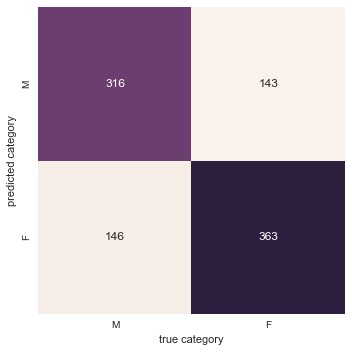

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

plt.style.use('classic')
%matplotlib inline
import seaborn as sns; sns.set()

mat = confusion_matrix(y_test, categories)

labels = ['M','F']

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=labels, yticklabels=labels)
plt.xlabel('true category')
plt.ylabel('predicted category');

o. Write a function that can be used to determine the gender of the author of a text.<br>
Use that function for the lyrics "My new dress is awesome." and "Last night I was playing the FIFA soccer game".

In [19]:
def predict_category(s, model=model):
    pred = model.predict([s])
    return pred[0]

print(predict_category("My new dress is cool."))
print(predict_category("Last night I was playing with my dolls"))

F
F


C:\Program Files\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
